In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn

In [23]:
# =============================================================================
# Clasificación
# =============================================================================
# importamos datos de sklearn


In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [25]:
dt=pd.DataFrame(data['data'], columns=data['feature_names'])
dt['Diagnosis']=np.where(data.target==1, "Malignant","Bening")
dt.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

In [26]:
print(data['target'][0:5]) # es la variable target
print(data['data'].shape) # 569 filas 30 columnas
print(data['feature_names']) # nombre de las variables
print(data['target_names']) # significado del target
print(data['DESCR'])

[0 0 0 0 0]
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation o

In [27]:
from sklearn.tree import DecisionTreeClassifier # predict roba
from sklearn.tree import DecisionTreeRegressor 
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
X=dt.drop('Diagnosis',axis=1)
y=data['target'] # 0 o 1

# aqui construimos un modelo
model = DecisionTreeClassifier()
#(max_depth=10)
# cada modelo tiene una función que dice que parametros tiene
# estos serian los parametros por defecto
print(model.get_params())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
tree_model=model.fit(X_train,y_train)
print("Train score", tree_model.score(X_train,y_train))
print("Test score", tree_model.score(X_test, y_test))
# train
y_pred=tree_model.predict(X_train)
probs=tree_model.predict_proba(X_train)
print("Train AUC", sklearn.metrics.roc_auc_score(y_train, probs[:,1]))
print("Train Accuracy", sklearn.metrics.accuracy_score(y_train,y_pred))
# test
y_pred=tree_model.predict(X_test)
probs=tree_model.predict_proba(X_test)
print("Test AUC", sklearn.metrics.roc_auc_score(y_test, probs[:,1]))
print("Test Accuracy",  sklearn.metrics.accuracy_score(y_test,y_pred))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Train score 1.0
Test score 0.9298245614035088
Train AUC 1.0
Train Accuracy 1.0
Test AUC 0.928030303030303
Test Accuracy 0.9298245614035088


In [29]:
tree_model

DecisionTreeClassifier()

In [30]:
print(tree.export_graphviz(tree_model, feature_names = data['feature_names']) )

with open("classifier.txt", "w") as f:
    f = tree.export_graphviz(tree_model, out_file=f,  feature_names = data['feature_names'])

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="mean concave points <= 0.051\ngini = 0.461\nsamples = 455\nvalue = [164, 291]"] ;
1 [label="worst area <= 957.45\ngini = 0.106\nsamples = 286\nvalue = [16, 270]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="area error <= 38.605\ngini = 0.056\nsamples = 275\nvalue = [8, 267]"] ;
1 -> 2 ;
3 [label="worst smoothness <= 0.178\ngini = 0.03\nsamples = 266\nvalue = [4, 262]"] ;
2 -> 3 ;
4 [label="mean concave points <= 0.05\ngini = 0.022\nsamples = 265\nvalue = [3, 262]"] ;
3 -> 4 ;
5 [label="smoothness error <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]"] ;
4 -> 5 ;
6 [label="mean symmetry <= 0.176\ngini = 0.245\nsamples = 7\nvalue = [1, 6]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 8 ;
9 [label="worst texture <= 33.27\ngini = 0.008\nsamples = 255\nvalue = [1, 254]"] 

https://dreampuf.github.io/GraphvizOnline/

In [31]:
# =============================================================================
# Building a tree decision model
# =============================================================================
# especificando el modelo
model = DecisionTreeClassifier()

# vemos los parametros que puede tener
print(model.get_params())
params={'max_depth': [5],# Maxima pofundidad del arbol #5
        'max_leaf_nodes': [10,15,20], # maximo de hojas del arbol #3
        'min_impurity_decrease' : [0.01, 0.02],#2 # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [10,20], ##4 The minimum number of samples required to split an internal node:
        'ccp_alpha': [0.0,0.01]#2 #240
        }

# scoring: lista de metricas a obtener
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['accuracy', 'roc_auc']

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [32]:
# CV (cross validación)
n_cv=5 # 5 folds
# creamos la GridSeacrh # cross-validation
grid_solver = GridSearchCV(estimator = model, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = n_cv,
                   refit = 'roc_auc', # cuando tienes mas de un score para tener un criterio de cual es el mejor modelo
                   verbose = 2)



model_result = grid_solver.fit(X_train,y_train)
# hemos ajustado el modelo

# best score es la media del best estimator
print("Mejor score:", model_result.best_score_)
# tenemos los mejores parametros
print("Mejores parametros:",model_result.best_params_)

# En este caso el score devuelve el roc_auc
print("Train Score:", model_result.score(X_train,y_train)) # score devulve la metrica del refit
print("Test Score:", model_result.score(X_test,y_test))
# Train
y_pred=model_result.predict(X_train)
probs=model_result.predict_proba(X_train)
print("Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred))

# test
model_result.score(X_test,y_test)
y_pred=model_result.predict(X_test)
probs=model_result.predict_proba(X_test)
print("Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs[:,1]))
print("Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=10, min_imp

[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.01, min_samples_split=20; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0, max_depth=5, max_leaf_nodes=15, min_impurity_decrease=0.02, min_samples_split=20; total time=   0.0s


In [33]:
# tenemos un atributo del mejor modelo
best_model=model_result.best_estimator_


# nos quedamos con el mejor modelo y reestimamos con toda la muestra
final_model=best_model.fit(X,y)

In [34]:
best_model

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_leaf_nodes=20,
                       min_impurity_decrease=0.01, min_samples_split=10)

# importancia de variables
https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees

In [35]:

importances=pd.DataFrame([X.columns,final_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head(10))

                 feature importance
20          worst radius   0.769188
27  worst concave points   0.153638
21         worst texture   0.077174
0            mean radius        0.0
1           mean texture        0.0
28        worst symmetry        0.0
26       worst concavity        0.0
25     worst compactness        0.0
24      worst smoothness        0.0
23            worst area        0.0


In [36]:
# resultados de la cross validation con parameter tunning
results=model_result.cv_results_
results=pd.DataFrame(results)

In [37]:
results.head(2).T

,0,1
mean_fit_time,0.014165,0.013561
std_fit_time,0.001932,0.001952
mean_score_time,0.012763,0.014055
std_score_time,0.002309,0.001344
param_ccp_alpha,0.0,0.0
param_max_depth,5,5
param_max_leaf_nodes,10,10
param_min_impurity_decrease,0.01,0.01
param_min_samples_split,10,20
params,"{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n...","{'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_n..."


e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


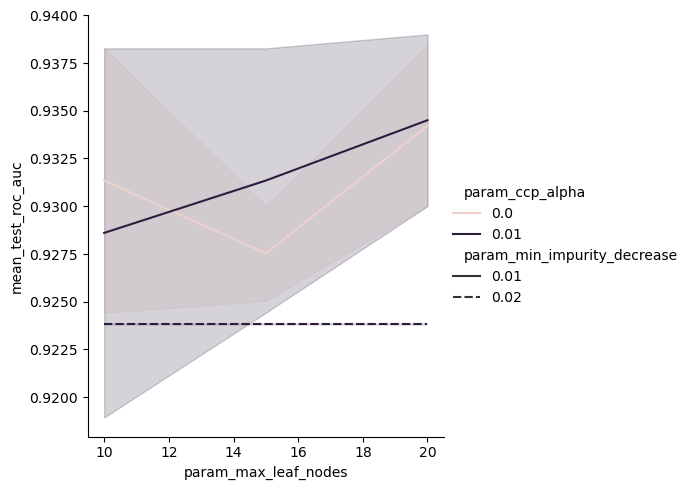

In [51]:
sns.relplot(x="param_max_leaf_nodes", 
            y="mean_test_roc_auc", 
            hue="param_ccp_alpha", # colores
            style="param_min_impurity_decrease",
            kind = "line", data=results)



In [50]:
params={'max_depth': [4,6,8],# Maxima pofundidad del arbol
        'max_leaf_nodes': [10], # maximo de hojas del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [3,6,9,15], # The minimum number of samples required to split an internal node:
        'ccp_alpha': [0.0,0.1]
        }

# Regresion

In [40]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
data = load_diabetes()
X=pd.DataFrame(data['data'],columns=data['feature_names'])
y=data.target

In [41]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
model=DecisionTreeRegressor()

In [43]:
n_cv=3
params={'criterion':['squared_error'],
        'max_depth': [10,15],# Maxima pofundidad del arbol
        'max_leaf_nodes': [10,30], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [5,10]# The minimum number of samples required to split an internal node:
        }

# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']


# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = n_cv,
                   refit = 'neg_mean_squared_error',
                   verbose = 1) # cuanto va a imprimir por pantalla

In [44]:
grid_solver.fit(X,y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [10, 15],
                         'max_leaf_nodes': [10, 30],
                         'min_impurity_decrease': [0.05],
                         'min_samples_split': [5, 10]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error', 'explained_variance', 'r2'],
             verbose=1)

In [45]:
grid_solver.predict(X)

array([231.34090909,  96.30994152, 167.6       , 174.39534884,
        96.30994152,  96.30994152,  96.30994152,  96.30994152,
       159.74468085, 167.6       ,  96.30994152, 159.74468085,
        96.30994152, 174.39534884,  96.30994152, 174.39534884,
       231.34090909, 174.39534884,  96.30994152,  96.30994152,
        96.30994152,  96.30994152,  96.30994152, 231.34090909,
       159.74468085, 174.39534884,  96.30994152, 159.74468085,
       139.94444444, 236.15384615, 159.74468085,  96.30994152,
       268.87096774,  96.30994152,  96.30994152, 137.69047619,
       231.34090909, 174.39534884, 268.87096774, 174.39534884,
       139.94444444,  96.30994152,  96.30994152,  96.30994152,
       167.6       ,  96.30994152,  96.30994152,  96.30994152,
        96.30994152, 174.39534884,  96.30994152, 231.34090909,
        96.30994152,  96.30994152, 159.74468085,  96.30994152,
       167.6       ,  96.30994152, 137.69047619, 137.69047619,
        96.30994152, 174.39534884,  96.30994152,  96.30

# Random Forest

In [46]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
n_cv=3
model = RandomForestRegressor()
params={'criterion':['squared_error'],
        'max_depth': [5,7],# Maxima pofundidad del arbol
        'max_features': [0.3, 0.7], # numero de features a considerar en cada split
        'max_samples' : [0.8,0.5],
        'max_leaf_nodes': [10,30], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [5,10], # The minimum number of samples required to split an internal node:
        'n_estimators': [100] # numero de arboles
        }

# scoring: lista de metricas a obtener
scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']



# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv,
                           refit = 'neg_mean_squared_error',
                           verbose = 1) # cuanto va a imprimir por pantalla

In [48]:
# entrenamos
model_result = grid_solver.fit(X,y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [49]:
model_result.best_estimator_

RandomForestRegressor(max_depth=5, max_features=0.7, max_leaf_nodes=30,
                      max_samples=0.5, min_impurity_decrease=0.05,
                      min_samples_split=10)